# CESM variables

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, cm
import netCDF4 as nc
import xarray as xr
import pickle
import cmocean
import pandas as pd
from scipy.stats import gaussian_kde, linregress

%matplotlib inline

Load data

In [4]:
folder = '/ocean/brogalla/GEOTRACES/data/NCAR/'
df_flx = xr.open_dataset(f'{folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.POC_FLUX_IN.200001-200912.nc')
df_prd = xr.open_dataset(f'{folder}b.e21.BHISTcmip6.f09_g17.LE2-1001.001.pop.h.POC_PROD.200001-200912.nc')

POC_flx   = df_flx['POC_FLUX_IN'].values
POC_prd   = df_prd['POC_PROD'].values
POC_lon   = df_flx['TLONG'].values
POC_lat   = df_flx['TLAT'].values
depth_flx = df_flx['z_t']*1e-2 # cm --> m
depth_prd = df_prd['z_t']*1e-2 # cm --> m

In [45]:
df_flx['time'][30]

<xarray.DataArray 'time' ()>
array(cftime.DatetimeNoLeap(2002, 8, 1, 0, 0, 0, 0, has_year_zero=True),
      dtype=object)
Coordinates:
    time     object 2002-08-01 00:00:00
Attributes:
    long_name:  time
    bounds:     time_bound

In [5]:
POC_flx_ar   = POC_flx.reshape((120,60,384*320))
POC_prd_ar   = POC_prd.reshape((120,60,384*320))
depth_flx_ar = np.tile(depth_flx, (384*320,1)).reshape((60,384*320))
depth_prd_ar = np.tile(depth_prd, (384*320,1)).reshape((60,384*320))

In [6]:
print(POC_flx_ar.shape, depth_flx_ar.shape)

(120, 60, 122880) (60, 122880)


In [7]:
print(POC_flx_ar[0,:,10000])

[0.0000000e+00 9.8765572e-04 1.8804885e-03 2.4178191e-03 2.8156633e-03
 3.6193428e-03 4.2402707e-03 4.2638630e-03 4.1061994e-03 3.8323428e-03
 3.5232566e-03 3.2681257e-03 3.0572820e-03 2.8786527e-03 2.7241178e-03
 2.5898085e-03 2.4721457e-03 2.3663358e-03 2.2692373e-03 2.1787607e-03
 2.0936895e-03 2.0130554e-03 1.9360337e-03 1.8619868e-03 1.7881235e-03
 1.7125114e-03 1.6350159e-03 1.5555503e-03 1.4740955e-03 1.3907064e-03
 1.3055209e-03 1.2187883e-03 1.1308765e-03 1.0420124e-03 9.4955007e-04
 8.5429038e-04 7.5742119e-04 6.6054915e-04 5.6568516e-04 4.7514279e-04
 3.9120184e-04 3.1587278e-04 2.5092569e-04 1.9726035e-04 1.5474384e-04
 1.2231077e-04 9.8282369e-05 8.0774953e-05 6.8037727e-05 5.8641959e-05
 5.1525683e-05 4.5950088e-05 4.1423515e-05 3.7627105e-05 3.4356410e-05
 3.1480078e-05 2.8912449e-05 2.6596294e-05           nan           nan]


Figures

(4000.0, 0.0)

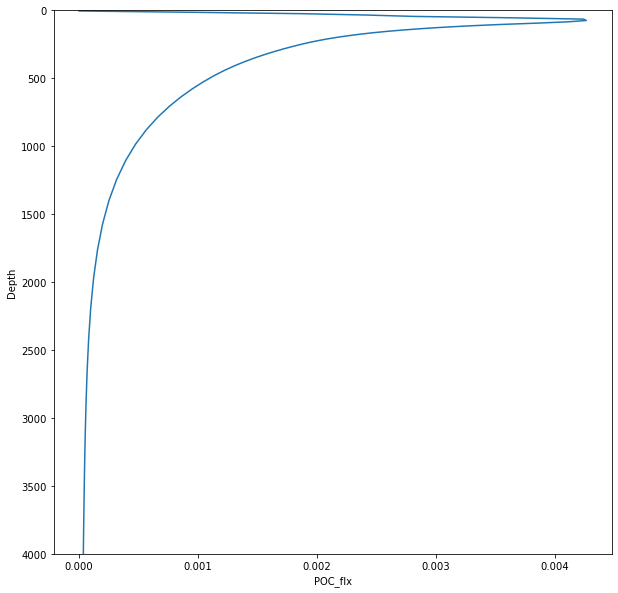

In [51]:
fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.set_xlabel('POC_flx')
ax.set_ylabel('Depth')
ax.invert_yaxis()

ax.plot(POC_flx_ar[0,:,10000], depth_flx)
# ax.plot(POC_prd_ar[0,:,10000], depth_prd)

ax.set_ylim(4000, 0)

In [53]:
POC_flx_ar[0,:,10000]/np.nanmax(POC_flx_ar[0,:,10000])

array([0.        , 0.23163402, 0.44102928, 0.56704897, 0.66035503,
       0.84884125, 0.9944669 , 1.        , 0.9630233 , 0.89879596,
       0.8263062 , 0.7664706 , 0.71702164, 0.67512786, 0.63888496,
       0.6073855 , 0.5797901 , 0.5549746 , 0.5322022 , 0.5109828 ,
       0.49103114, 0.4721201 , 0.45405626, 0.43669012, 0.41936702,
       0.40163377, 0.38345885, 0.36482182, 0.34571832, 0.32616115,
       0.30618265, 0.28584135, 0.26522344, 0.24438223, 0.22269714,
       0.20035596, 0.17763732, 0.154918  , 0.13266964, 0.11143482,
       0.09174822, 0.07408136, 0.05884938, 0.0462633 , 0.03629194,
       0.02868544, 0.02305008, 0.01894408, 0.01595683, 0.01375325,
       0.01208427, 0.01077663, 0.00971502, 0.00882465, 0.00805758,
       0.00738299, 0.00678081, 0.00623761,        nan,        nan],
      dtype=float32)

#### Maps

In [39]:
def plot_slicemap(variable, depth_slice, vmin=0, vmax=1e-9, cmap=cmocean.cm.matter):
    fig, ax, proj = pickle.load(open('/ocean/brogalla/GEOTRACES/pickles/pb-surface.pickle','rb'))

    x, y = proj(POC_lon, POC_lat)

    cb = proj.pcolormesh(x, y, variable[depth_slice,:,:], cmap=cmap, vmin=vmin, vmax=vmax)#, levels=20)
    
    cbaxes  = fig.add_axes([0.95, 0.15, 0.02, 0.7]) 
    CBar    = plt.colorbar(cb , ax=ax, cax=cbaxes, format='%.2e') 
    CBar.ax.tick_params(axis='y', length=0, labelsize=6)
    CBar.set_label('POC flux (mmol/m3 cm/s)', fontsize=7)
    
    return

In [29]:
POC_flx_plt = np.ma.masked_where(np.isnan(POC_flx), POC_flx)

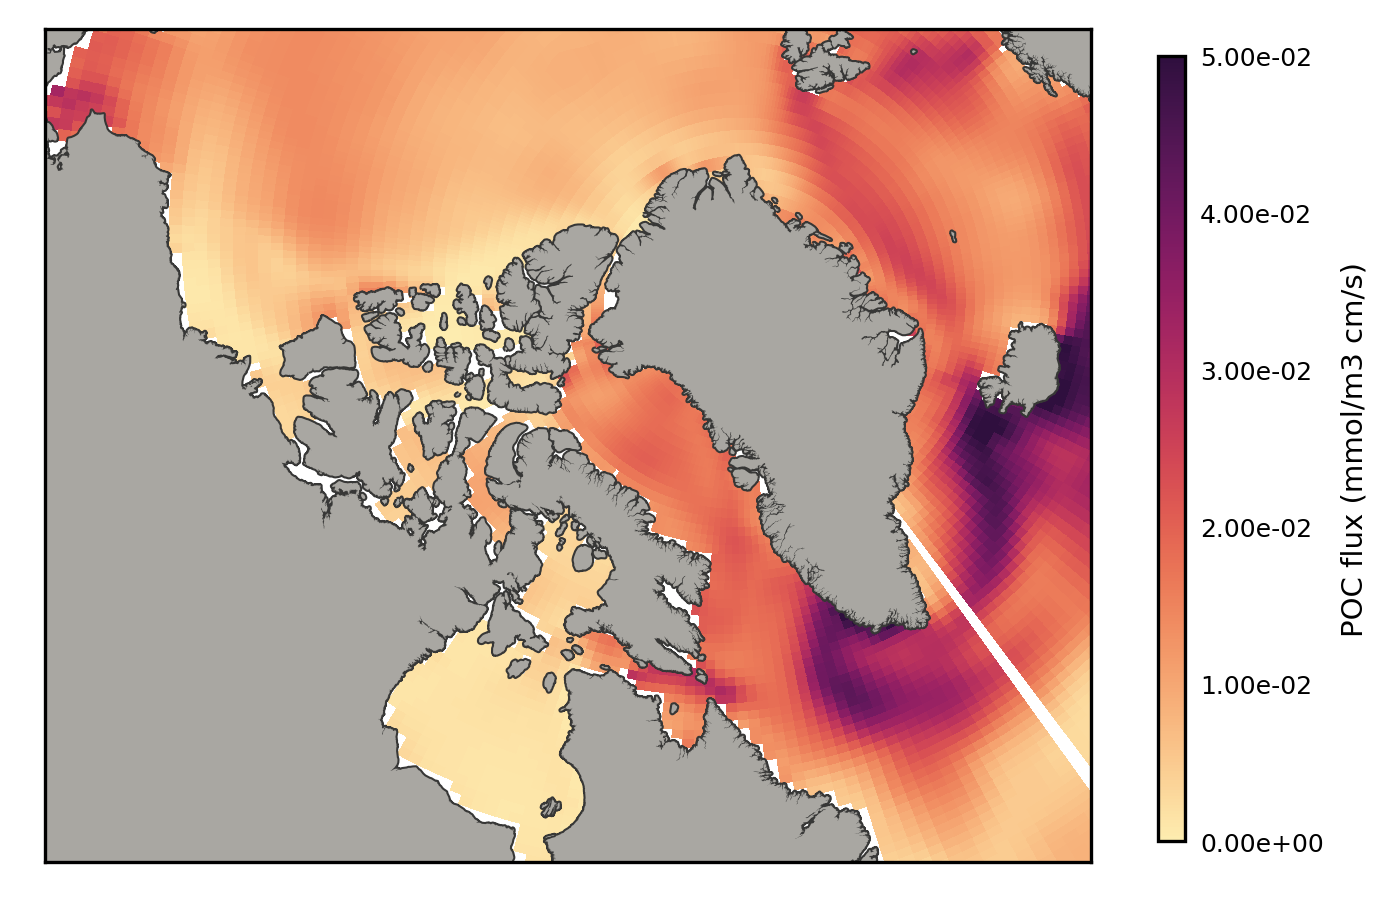

In [53]:
plot_slicemap(POC_flx_plt[30,:,:,:], 2, vmin=0, vmax=5e-2)